In [91]:
import cv2 as cv
from utils import *
import os

## Original Image


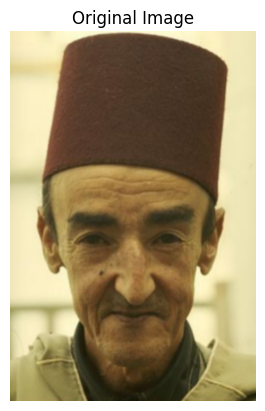

In [92]:
img = read_image("images/cartoon/image1.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show_image(img, "Original Image")

## Gray Image


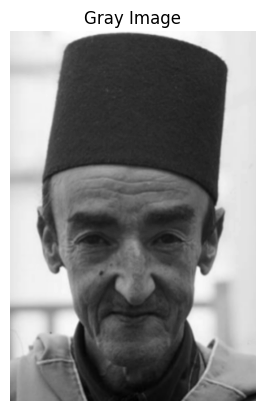

In [93]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_image(gray_img, "Gray Image")

## Noise Reduction Using Median Filter


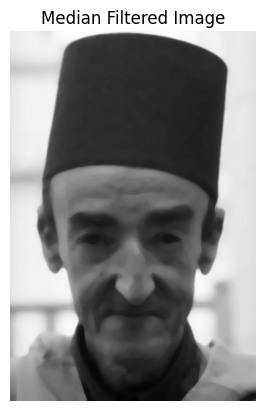

In [94]:
median_filtered_img = cv.medianBlur(gray_img, 13)
show_image(median_filtered_img, "Median Filtered Image")

## Edge Detection Using Laplacian Filter


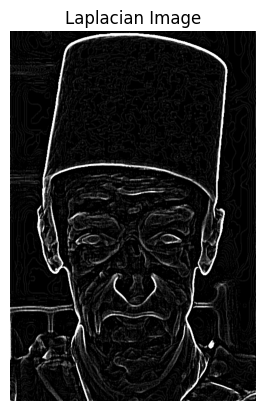

In [95]:
laplacian = cv.Laplacian(median_filtered_img, cv.CV_8U, ksize=5)
laplacian = cv.dilate(laplacian, kernel=(1, 1), iterations=1)
show_image(laplacian, "Laplacian Image")

## Thresholding and convert to BGR (3 channels)


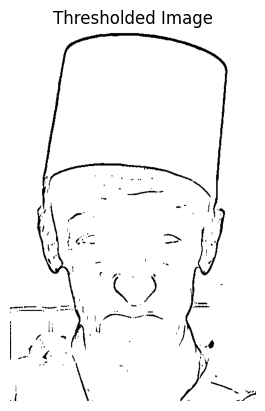

In [96]:
_, thresholded_img = cv.threshold(laplacian, 127, 255, cv.THRESH_BINARY_INV)
thresholded_img_BGR = cv.cvtColor(thresholded_img, cv.COLOR_GRAY2BGR)
show_image(thresholded_img_BGR, "Thresholded Image")

## Color Painting


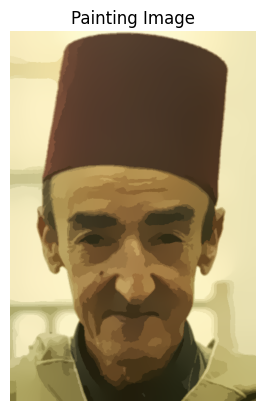

In [97]:
painting = img

for i in range(12):
    painting = cv.bilateralFilter(painting, d=-1, sigmaColor=10, sigmaSpace=10)

show_image(painting, "Painting Image")

## Cartoon Image (Overlay)


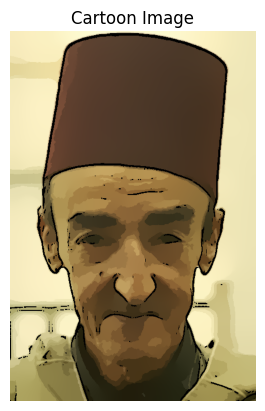

In [98]:
cartoon = cv.bitwise_and(painting, thresholded_img_BGR)
show_image(cartoon, "Cartoon Image")

## Cartoonifying Function


In [99]:
def cartoonize_image(img):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    median_filtered_img = cv.medianBlur(gray_img, 13)
    laplacian = cv.Laplacian(median_filtered_img, cv.CV_8U, ksize=5)
    laplacian = cv.dilate(laplacian, kernel=(1, 1), iterations=1)
    _, thresholded_img = cv.threshold(laplacian, 127, 255, cv.THRESH_BINARY_INV)
    thresholded_img_BGR = cv.cvtColor(thresholded_img, cv.COLOR_GRAY2BGR)
    painting = img
    for _ in range(15):
        painting = cv.bilateralFilter(painting, d=-1, sigmaColor=10, sigmaSpace=10)
    cartoon = cv.bitwise_and(painting, thresholded_img_BGR)
    return cartoon

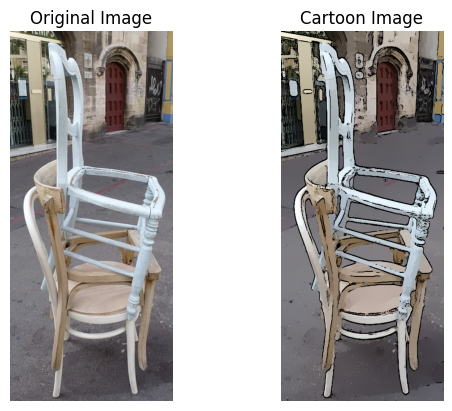

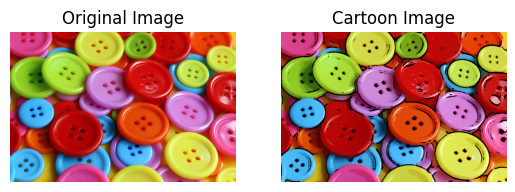

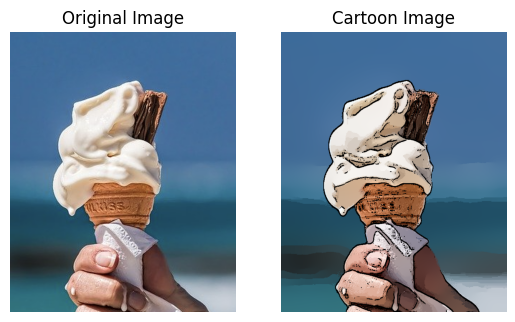

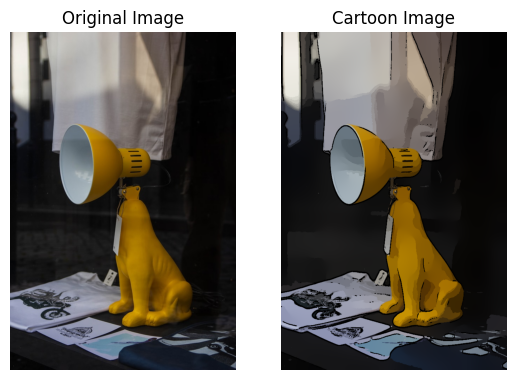

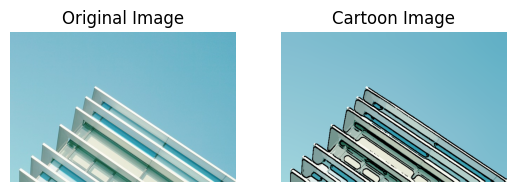

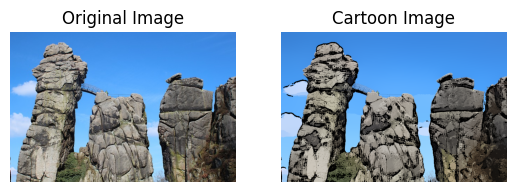

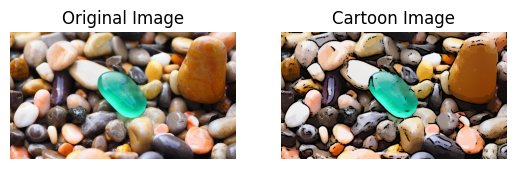

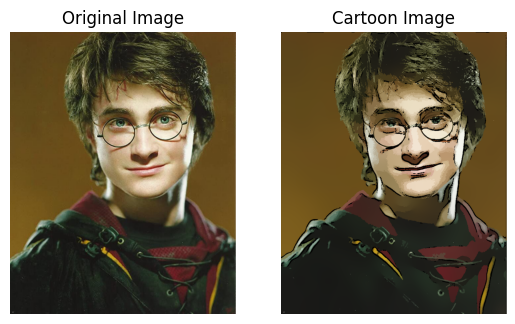

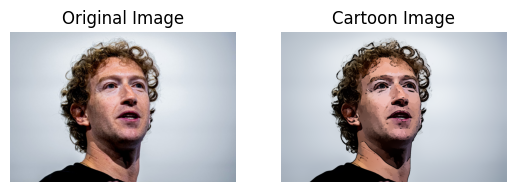

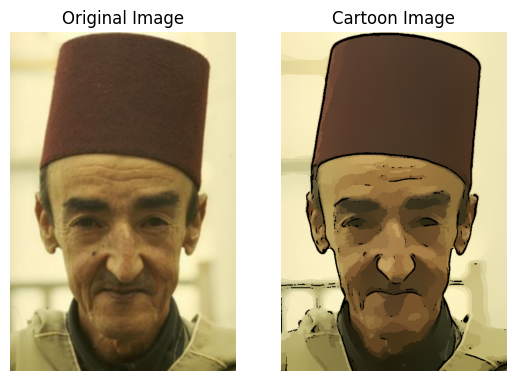

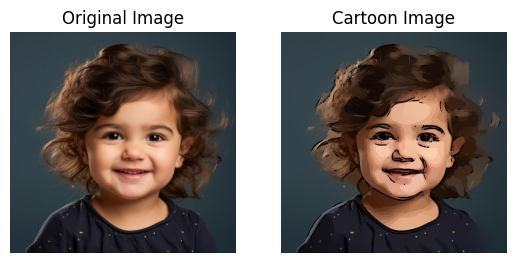

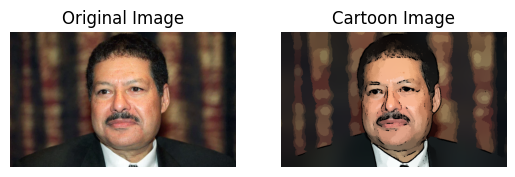

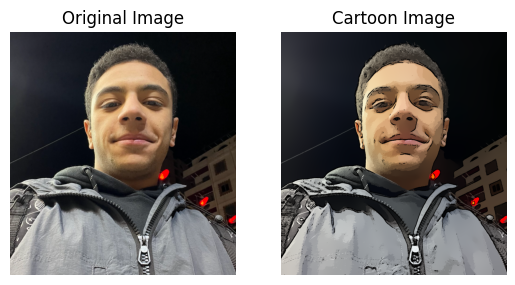

In [100]:
for filename in os.listdir("images/cartoon"):
    
    path = os.path.join("images/cartoon", filename)
    
    img = read_image(path)

    cartoon = cartoonize_image(img)

    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    cartoon = cv.cvtColor(cartoon, cv.COLOR_BGR2RGB)

    show_diff(img, cartoon, "Original Image", "Cartoon Image")